In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zubairamuti/shopping-behaviours-dataset")

print("Path to dataset files:", path)
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)


sns.set_theme(style='ticks')

df.head()

Path to dataset files: C:\Users\RAZER\.cache\kagglehub\datasets\zubairamuti\shopping-behaviours-dataset\versions\1


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#Analyzing Age, Category, Gender, sizes, Seasons 
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
pd.DataFrame(df.columns , columns=['Column Name'])

,Column Name
0,Customer ID
1,Age
2,Gender
3,Item Purchased
4,Category
5,Purchase Amount (USD)
6,Location
7,Size
8,Color
9,Season


In [ ]:
#ARE THERE ANY DUPLICATESE ?

print('The duplicated values in the dataset are:', df.duplicated().sum())

The duplicated values in the dataset are: 0


In [ ]:
#Checking If There Are Null Values Present In The Dataset?
df.isna().sum()


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

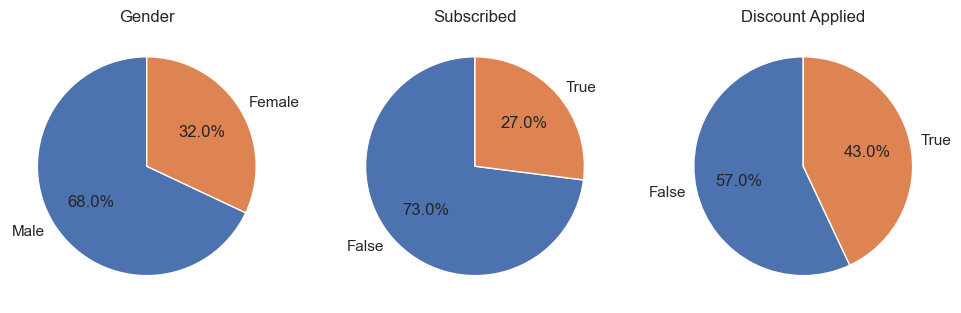

In [ ]:
dict_column = {
    'Gender' : 'Gender',
    'Subscription Status' : 'Subscribed',
    'Discount Applied' : 'Discount Applied'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    t_f = ['False','True']
    if i==0:
        t_f = ['Male', 'Female']
    ax[i].pie(df[column].value_counts(), labels=t_f,autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
plt.show()

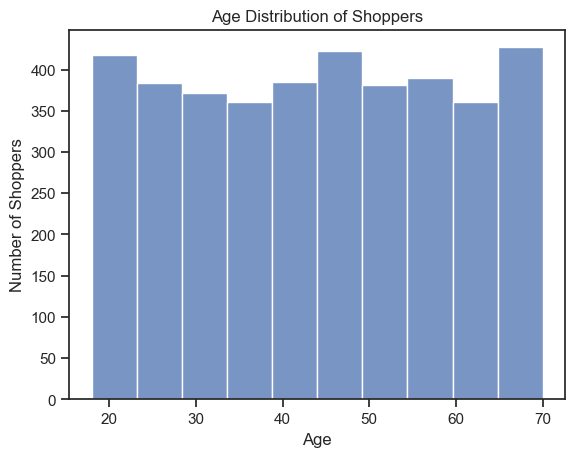

In [ ]:
#Age Analysis
sns.histplot(df['Age'], fill=True, bins=10)
plt.title('Age Distribution of Shoppers')
plt.ylabel('Number of Shoppers')
plt.show()

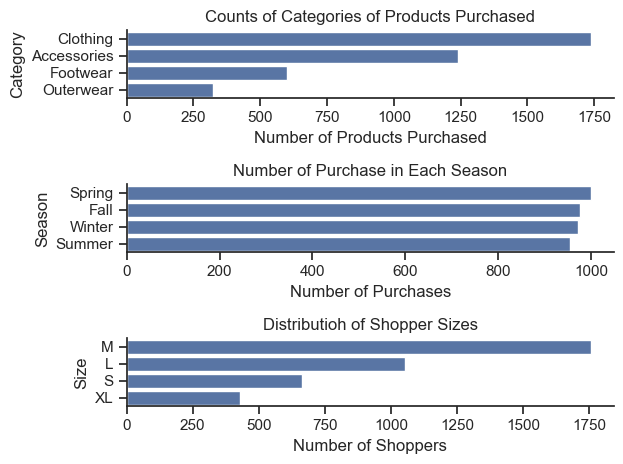

In [ ]:
#Category, Size and Season Analysis 
fig, ax = plt.subplots(3,1)

#Category Analysis
df_category = df['Category'].value_counts().to_frame()
sns.barplot(df_category, x='count', y='Category',ax=ax[0])
sns.despine()
ax[0].set_title('Counts of Categories of Products Purchased')
ax[0].set_xlabel('Number of Products Purchased')

#Season Analysis
df_season = df['Season'].value_counts().to_frame()
sns.barplot(df_season, x='count', y=df_season.index, ax=ax[1])
sns.despine()
ax[1].set_title('Number of Purchase in Each Season')
ax[1].set_xlabel('Number of Purchases')

#Size Analysis
df_size = df['Size'].value_counts().to_frame()
sns.barplot(df_size, x='count', y=df_size.index, ax=ax[2])
sns.despine()
ax[2].set_title('Distribution of Shoppers\' Sizes')
ax[2].set_xlabel('Number of Shoppers')


plt.tight_layout()
plt.show()


#Questions that can be asked :

#1. Who spends more money man or women 

#2. which product categories and colors are most popular in different seasons

#3. patterns in payment method usage

#4. Who rates more Men or Women 

#5. Correlation between Rating and Discount 


In [12]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

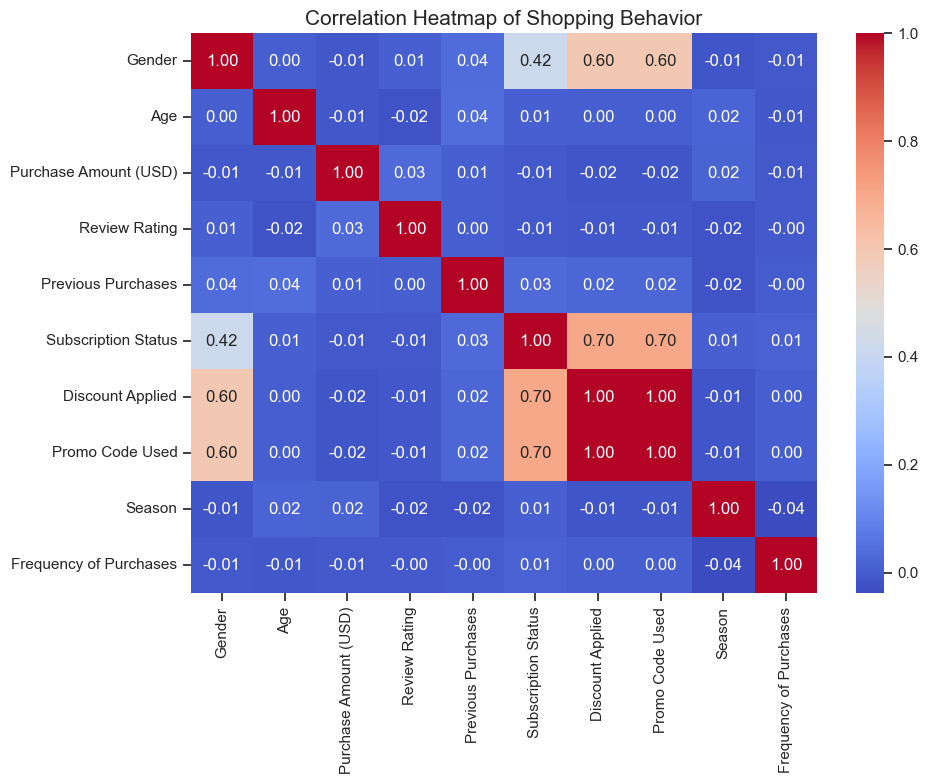

In [13]:
#Correlation heatmap 
df_encoded = df.copy()

binary_cols = ['Subscription Status','Discount Applied','Promo Code Used']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes' : 1,'No':0})

season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df_encoded['Season'] = df_encoded['Season'].map(season_map)
gender_map = {'Male':1, 'Female':0}
df_encoded['Gender']=df_encoded['Gender'].map(gender_map)
freq_map = {
    'Annually': 1,
    'Quarterly': 2,
    'Every 3 Months': 3,
    'Monthly': 4,
    'Fortnightly': 5,
    'Bi-Weekly': 6,
    'Weekly': 7
}
df_encoded['Frequency of Purchases'] = df_encoded['Frequency of Purchases'].map(freq_map)

corr_columns = [
    'Gender',
    'Age',
    'Purchase Amount (USD)',
    'Review Rating',
    'Previous Purchases',
    'Subscription Status',
    'Discount Applied',
    'Promo Code Used',
    'Season',
    'Frequency of Purchases'
]
corr_data = df_encoded[corr_columns]
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Shopping Behavior',fontsize=15)
plt.tight_layout()
plt.show()

we can notice that there correlation betweem gender, subscription status,  discount applied and promo code used